In [ ]:
pip install SALib

In [4]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
from Experiment import *

In [1]:
from simulate_network import Market

In [45]:
# Define the parameter space
problem = {
    'num_vars': 6,
    'names': [
        'number_of_traders', 'percent_rational', 'percent_risky',
        'high_lookback', 'high_risk', 'new_node_edges'],
    'bounds': [
        [50, 200],  # number_of_traders
        [0.05, 1.0],  # percent_rational
        [0.05, 1.0],  # percent_risky
        [5, 30],        # high_lookback
        [0.05, 0.20],  # high_risk
        [2, 10],  # new_node_edges
    ]
}

In [21]:
from SALib.sample import sobol
from SALib.analyze import sobol as sobol_analyze
from scipy.stats import kurtosis
import numpy as np
import time

In [ ]:
high_risk = 0.01
high_lookback = 1
number_of_traders = 100
percent_rational = 0.5
percent_risky = 0.5

In [ ]:
parameters = [high_risk, high_lookback, number_of_traders, percent_rational, percent_risky]

Progress: [--------------------------------------------------] 0%    

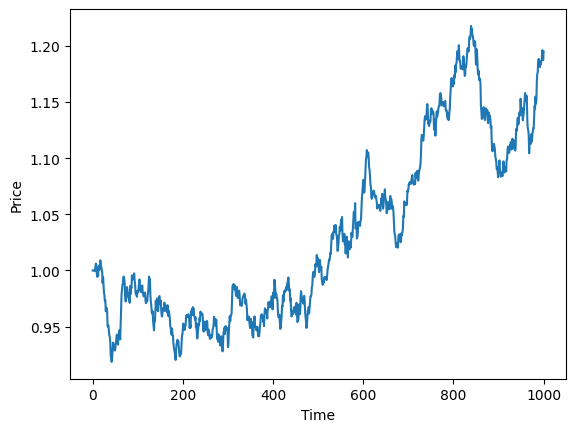

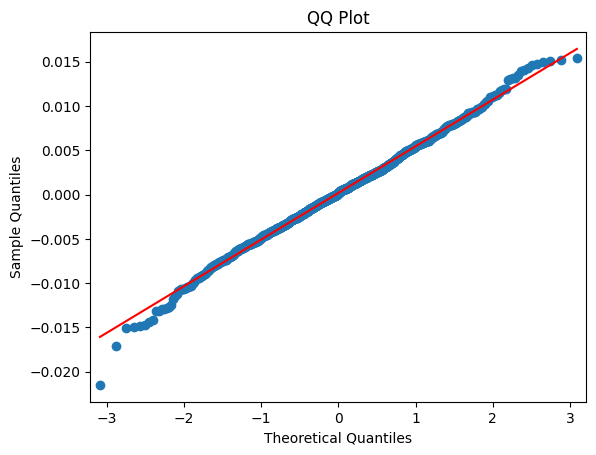

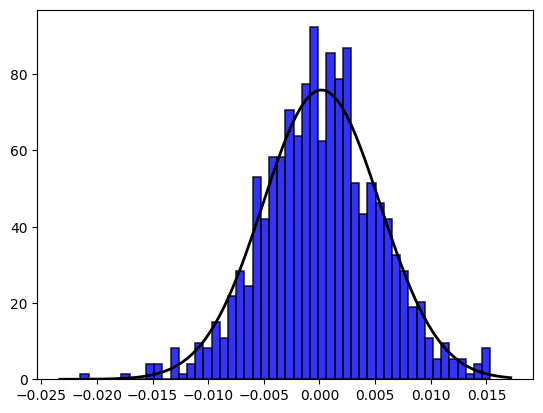

Sample kurtosis (K value): 0.40327530956586966


In [71]:

experiment = Experiment(initial_price=0, 
                            time_steps=1000,
                            network_type="barabasi",
                            number_of_traders=200,
                            percent_fund=0.50,
                            percent_chartist=0.50,
                            percent_rational=0.2,
                            percent_risky=0.2,
                            high_lookback=5,
                            low_lookback=1,
                            high_risk=0.25,
                            low_risk=0.1,
                            new_node_edges=6,
                            connection_probability=0.50,
                            mu=0.01,
                            beta=1,
                            alpha_w=2668,
                            alpha_O=2.1,
                            alpha_p=0
                            )
     #experiment.flash_crash_experiment()
     #market = experiment.run_simulation()  # Ensure proper recepte market
     #experiment.analyze_autocorrelation_of_returns(market.prices)
experiment.fat_tail_experiment(1000)

In [67]:
def model(params):
    exp = Experiment(
        initial_price=0,
        time_steps= 1000,
        network_type='barabasi',
        number_of_traders=int(params[0]),
        percent_fund = 0.5,
        percent_chartist=0.5,
        percent_rational=params[1],
        percent_risky=params[2],
        high_lookback=int(params[3]),
        low_lookback=1,
        high_risk=params[4],
        low_risk=0.01,
        new_node_edges=int(params[5]),
        connection_probability=0.5,
        mu=0.01,
        beta=1,
        alpha_w=2668,
        alpha_O=2.1,
        alpha_p=0
    )
    market = exp.run_simulation()
    returns = np.diff(market.prices)
    return kurtosis(returns)


In [61]:
params = [50, 0.5, 0.5, 5, 0.1, 5]
model(params)

2.6828272132579043

In [65]:
# Generate Sobol samples
param_values = sobol.sample(problem, 8)

results = []

for i, params in enumerate(param_values):
    exp = Experiment(
        initial_price=0,
        time_steps= 1000,
        network_type='barabasi',
        number_of_traders=int(params[0]),
        percent_fund = 0.5,
        percent_chartist=0.5,
        percent_rational=params[1],
        percent_risky=params[2],
        high_lookback=int(params[3]),
        low_lookback=1,
        high_risk=params[4],
        low_risk=0.01,
        new_node_edges=10,
        connection_probability=0.5,
        mu=0.01,
        beta=1,
        alpha_w=2668,
        alpha_O=2.1,
        alpha_p=0
    )
    market = exp.run_simulation()
    returns = np.diff(market.prices)
    k = kurtosis(returns)
    

Progress: [████████████████████------------------------------] 40%                                  

KeyboardInterrupt: 

In [57]:
# Generate Sobol samples
param_values = sobol.sample(problem, 8)

results = []

start_time = time.time()
for i, params in enumerate(param_values):
    results.append(model(params))
    if i % 10 == 0:
        print(f"Progress: {i / len(param_values) * 100:.2f}%")

total_time = time.time() - start_time
print(f"Total time for all runs: {total_time / 3600:.2f} hours")

sobol_indices = sobol.analyze(problem, np.array(results))

print("Sobol Sensitivity Indices")
print("S1 (First order indices):")
print(sobol_indices['S1'])
print("ST (Total order indices):")
print(sobol_indices['ST'])

# Optionally, visualize the Sobol indices
plt.figure(figsize=(10, 6))
plt.bar(problem['names'], sobol_indices['S1'], align='center', alpha=0.7)
plt.xlabel('Parameters')
plt.ylabel('First Order Sensitivity Indices')
plt.title('First Order Sobol Sensitivity Indices')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(problem['names'], sobol_indices['ST'], align='center', alpha=0.7)
plt.xlabel('Parameters')
plt.ylabel('Total Order Sensitivity Indices')
plt.title('Total Order Sobol Sensitivity Indices')
plt.show()

Progress: 0.00%                                                                                     
Progress: 8.93%                                                                                     


IndexError: pop from empty list